<h1>K - Nearest Neighbour</h1>

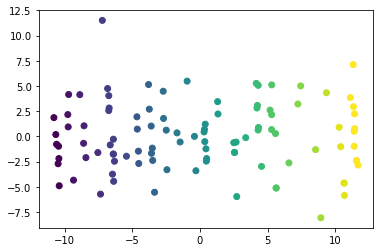

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import neighbors

n_neighbors = 3

dataset = pd.read_csv("../Datasets/fifa_data.csv")
dataset = dataset[["Position","Overall","Age"]]

'''
Cleaning
'''
dataset = dataset.head(100)
dataset = dataset.fillna(0)

'''
Transformation
'''
# Position columns transformation
le = preprocessing.LabelEncoder()
dataset["Position"] = le.fit_transform(dataset["Position"])

# PCA Transformation
pca = PCA(n_components = 2, random_state=1)
df_pca = pca.fit_transform(dataset)

# KNN fitting
fifa_clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
fifa_clf.fit(df_pca, dataset["Position"])

# Plot
plt.scatter(df_pca[:,0],df_pca[:,1],c=dataset['Position'])